In [4]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

In [5]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)

df["target"] = iris.target
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [6]:
x = np.array(df[iris["feature_names"]])
y = np.array(df["target"])

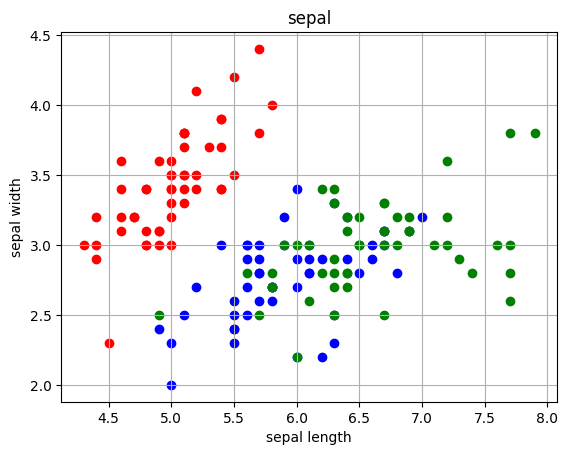

In [7]:
iris_df1 = pd.DataFrame(iris.data[:50])
iris_df2 = pd.DataFrame(iris.data[50:100])
iris_df3 = pd.DataFrame(iris.data[100:150])

plt.scatter(iris_df1[0], iris_df1[1], c="red")
plt.scatter(iris_df2[0], iris_df2[1], c="blue")
plt.scatter(iris_df3[0], iris_df3[1], c="green")

plt.title('sepal')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.grid(True)
plt.show()

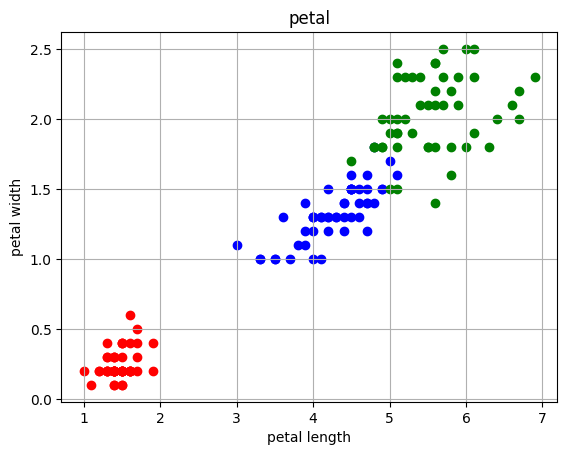

In [8]:
plt.scatter(iris_df1[2], iris_df1[3], c="red")
plt.scatter(iris_df2[2], iris_df2[3], c="blue")
plt.scatter(iris_df3[2], iris_df3[3], c="green")

plt.title('petal')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.grid(True)
plt.show()

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

model = SVC(kernel='linear', random_state=0)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('y_test: ',y_test[:10])
print('y_pred: ',y_pred[:10])


y_test:  [2 1 0 2 0 2 0 1 1 1]
y_pred:  [2 1 0 2 0 2 0 1 1 1]


In [10]:
y_train_pred = model.predict(x_train)
train_acc = accuracy_score(y_train, y_train_pred)
print('train score: ',train_acc)
 
y_test_pred = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred)
print('test score: ',test_acc)

train score:  0.975
test score:  1.0


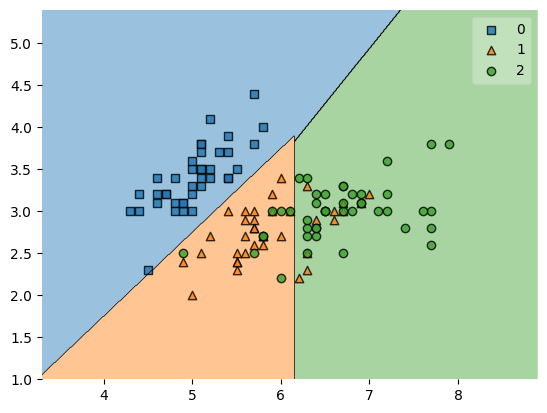

In [11]:
x_decision = x_train[:, [0,1]]
y_decision = y_train

model.fit(x_decision, y_decision)

plot_decision_regions(x_decision, y_decision, clf=model)
plt.show()